In [8]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/My Drive/UCL/Repos/Textual-LSD

/content/drive/My Drive/UCL/Repos/Textual-LSD


In [ ]:
!git pull


Already up to date.


In [9]:
from tkinter.tix import MAX
import torch
import nltk
import utils
import torch.nn.functional as F

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [12]:
##### Key Variables #####
# Hashed values are those used in the reference paper
EPOCHS = 50 #Until convergence
BATCH_SIZE = 64 
LR = 3e-4 #2e-5
USE_DOM = True
FILENAME = 'Datasets/train_balanced.xlsx'
VAL_FILEANAME= "Datasets/validation_bal_3Apr.xlsx"
ATTENTION_HEADS = 5 
EMBEDDING_SIZE = 350 
NUM_ENCODER_LAYERS = 1 
FORWARD_XP = 64
DROPOUT = 0.25 
MAXLENGTH = 128
MT_HEADS = 8 # 8
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'
print('Using ', DEVICE)

PRINT_STEP = 25
SAVE_STEP = 10
w2v = torch.load('glove_weights_1000.pkl')
w2v.requires_grad = True
w2v = F.normalize(w2v, dim=1)
print(w2v.shape)

trainer = utils.Textual_LSD_TVT(verbose=True)
trainer.load_dataset(FILENAME, MAXLENGTH, BATCH_SIZE)#, validation=True)
trainer.load_dataset(VAL_FILEANAME, MAXLENGTH, BATCH_SIZE, validation=True)

#trainer.load_vocab('vocab_emb64.pkl')
trainer.load_vocab('Pickles/NewVocab.pkl')
trainer.generate_models(EMBEDDING_SIZE, ATTENTION_HEADS, DROPOUT, USE_DOM,
                        LR, MT_HEADS, NUM_ENCODER_LAYERS, FORWARD_XP, DEVICE, lr_pat=15)
trainer.train(EPOCHS, PRINT_STEP, SAVE_STEP, enc_version=1,save_epochs=2,validation_freq=1)
trainer.plot_data(averaging_window=1)

Using  cuda
torch.Size([1000, 50])
Starting Load Dataset...
Succesfully Loaded Dataframe
Starting Load Dataset...
Succesfully Loaded Dataframe
Starting Load Vocab...
training vocab loaded
validation vocab loaded
Successfully Loaded Pickles/NewVocab.pkl into vocabulary
emb350att5mt8fx64len128drp025dom1
Starting Generate Models...
Models Generated Successfully
Number of batches per epoch: 207
Printing every 25 batches, saving every 10 batches
Epoch 1 / 50
Batch 25 / 207
25 batch average loss: 3.5200817662823085
Batch Accuracy: 27.81%

Batch 50 / 207
25 batch average loss: 3.474855430422176
Batch Accuracy: 22.97%

Batch 75 / 207
25 batch average loss: 3.4797775829396413
Batch Accuracy: 24.69%



KeyboardInterrupt: ignored

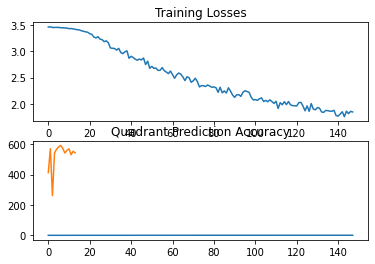

In [ ]:
trainer.plot_data(averaging_window=1,validation=True)